<img src="https://i.imgur.com/6U6q5jQ.png"/>

<a target="_blank" href="https://colab.research.google.com/github/SocialAnalytics-StrategicIntelligence/introTextData/blob/main/index.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Text as Data

Let me get use some old tweets from Donald Trump:

In [1]:
import pandas as pd
import os

trumpFile = r"/workspaces/Tarea-4_ASIES/tarea4/trumps.csv"
allTweets = pd.read_csv(trumpFile)
allTweets

,created_at,text,is_retweet,favorite_count,retweet_count,Hour,Day,Date
0,2020-08-13 23:26:50,.@DonYoungAK really produces for Alaska. He is...,False,18714,5305,23,5,2020-08-13
1,2020-08-13 23:23:26,"...She will be a great Senator, and has my Com...",False,14946,3490,23,5,2020-08-13
2,2020-08-13 23:23:25,.@CynthiaMLummis is a friend of mine and a gre...,False,32586,8584,23,5,2020-08-13
3,2020-08-13 21:27:36,LIVE: President @realDonaldTrump holds a news ...,True,0,5917,21,5,2020-08-13
4,2020-08-13 18:59:29,https://t.co/ymvtIzQqoR,False,20131,5303,18,5,2020-08-13
...,...,...,...,...,...,...,...,...
194,2020-08-04 23:00:40,Reopening Our Schools: @realDonaldTrump says s...,True,0,7205,23,3,2020-08-04
195,2020-08-04 23:00:38,Reopening America: President @realDonaldTrump ...,True,0,7603,23,3,2020-08-04
196,2020-08-04 23:00:15,We have far and away the most robust testing c...,True,0,5717,23,3,2020-08-04
197,2020-08-04 22:48:35,"""As we shelter those at high risk, we are also...",True,0,5414,22,3,2020-08-04


Let me subset the dataframe, just to keep the non retweets:

In [2]:
DTtweets=allTweets[~allTweets.is_retweet]
DTtweets.reset_index(drop=True,inplace=True)

## Tokenization

A key step for text analytics is tokenization: where the text is broken into smaller pieces.

We can use:

- NLTK library:

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import nltk
from nltk.tokenize import word_tokenize

DTtweets['text'].apply(nltk.word_tokenize)

0      [., @, DonYoungAK, really, produces, for, Alas...
1      [..., She, will, be, a, great, Senator, ,, and...
2      [., @, CynthiaMLummis, is, a, friend, of, mine...
3                          [https, :, //t.co/ymvtIzQqoR]
4                          [https, :, //t.co/BY6PrMRmqJ]
                             ...                        
116    [For, those, that, thought, I, wasn, ’, t, int...
117    [A, great, race, run, by, Roger, against, a, v...
118    [There, is, TREMENDOUS, Lawlessness, in, Ameri...
119                        [https, :, //t.co/JDS4zUXXJG]
120    [Great, meeting, today, with, the, CoronaVirus...
Name: text, Length: 121, dtype: object

* Pandas string functions:

In [5]:
DTtweets.text.str.split('\s')

0      [.@DonYoungAK, really, produces, for, Alaska.,...
1      [...She, will, be, a, great, Senator,, and, ha...
2      [.@CynthiaMLummis, is, a, friend, of, mine, an...
3                              [https://t.co/ymvtIzQqoR]
4                              [https://t.co/BY6PrMRmqJ]
                             ...                        
116    [For, those, that, thought, I, wasn’t, into, t...
117    [A, great, race, run, by, Roger, against, a, v...
118    [There, is, TREMENDOUS, Lawlessness, in, Ameri...
119                            [https://t.co/JDS4zUXXJG]
120    [Great, meeting, today, with, the, CoronaVirus...
Name: text, Length: 121, dtype: object

The basic Pandas seems more convenient. Then, we simply create a series where each cell is a token (word):

In [6]:
import numpy as np

wordInSeries=pd.Series(np.concatenate(DTtweets.text.str.split('\s')))
wordInSeries

0                   .@DonYoungAK
1                         really
2                       produces
3                            for
4                        Alaska.
                  ...           
2915                        Stay
2916                    informed
2917                         at:
2918    https://t.co/p9j7kZsD7b.
2919     https://t.co/nnnUHCzOLV
Length: 2920, dtype: object

### Cleaning the tokens

In [7]:
wordInSeries=wordInSeries[~wordInSeries.str.startswith('http')].reset_index(drop=True)
wordInSeries

0       .@DonYoungAK
1             really
2           produces
3                for
4            Alaska.
            ...     
2861            Oval
2862         Office.
2863            Stay
2864        informed
2865             at:
Length: 2866, dtype: object

In [8]:
wordInSeries=wordInSeries.str.replace('[^\x01-\x7F]','')
wordInSeries=wordInSeries.str.replace('&amp;','and')
wordInSeries=wordInSeries.str.replace('&lt;|&gt;','')
wordInSeries

0       .@DonYoungAK
1             really
2           produces
3                for
4            Alaska.
            ...     
2861            Oval
2862         Office.
2863            Stay
2864        informed
2865             at:
Length: 2866, dtype: object

In [9]:
# punctuation
import string
PUNCs=string.punctuation # '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
wordInSeries=wordInSeries.str.replace('['+PUNCs+']', '',regex=True)

# all to lower case
wordInSeries=wordInSeries.str.lower()
wordInSeries

0       donyoungak
1           really
2         produces
3              for
4           alaska
           ...    
2861          oval
2862        office
2863          stay
2864      informed
2865            at
Length: 2866, dtype: object

### Relevant tokens

It is difficult to know what tokens should not be analyzed. Let's count the current ones:

In [10]:
wordInSeries.value_counts()

the          136
and           91
to            79
in            67
of            58
            ... 
playing        1
game           1
sources        1
“sources”      1
pure           1
Name: count, Length: 1027, dtype: int64

We could agree that simple sintactic components like determinatives, conjunctions, or prepositions do carry much information. Most of these elements are known as **STOPWORDS**.  We use them to reduce our tokens:

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords
STOPS = stopwords.words('english')


wordInSeries=wordInSeries[~wordInSeries.isin(STOPS)].reset_index(drop=True)
wordInSeries

0       donyoungak
1           really
2         produces
3           alaska
4       incredible
           ...    
1681         force
1682          oval
1683        office
1684          stay
1685      informed
Length: 1686, dtype: object

## Word Frequency

We could keep prepare a frequency with the words remaining:

In [13]:
wordInSeries.value_counts()

great       27
bus         20
people      18
usdot       17
big         15
            ..
men          1
women        1
fighting     1
plague       1
stock        1
Name: count, Length: 927, dtype: int64

Let's see the distribution of counts:

<Axes: ylabel='Frequency'>

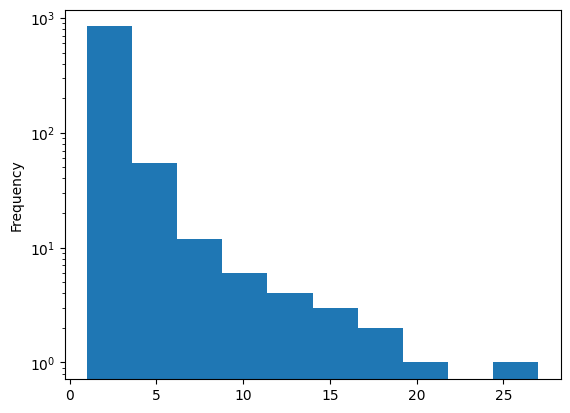

In [14]:
wordInSeries.value_counts().plot(logy=True, kind='hist')

In [15]:
FrequencyTrumpTokens=wordInSeries.value_counts()[wordInSeries.value_counts()>5]
FrequencyTrumpTokens

great              27
bus                20
people             18
usdot              17
big                15
infrastructure     14
service            14
support            13
complete           12
news               12
state              12
endorsement        11
federal            11
joe                10
total              10
funds              10
congratulations     9
                    8
thank               8
biden               8
improvements        8
second              7
first               7
president           7
happy               7
good                7
states              7
new                 7
fake                7
vets                6
one                 6
strong              6
congressman         6
would               6
amendment           6
win                 6
way                 6
funding             6
Name: count, dtype: int64

We have series, let me have a dict:

In [16]:
FrequencyTrumpTokens.to_dict()

{'great': 27,
 'bus': 20,
 'people': 18,
 'usdot': 17,
 'big': 15,
 'infrastructure': 14,
 'service': 14,
 'support': 13,
 'complete': 12,
 'news': 12,
 'state': 12,
 'endorsement': 11,
 'federal': 11,
 'joe': 10,
 'total': 10,
 'funds': 10,
 'congratulations': 9,
 '': 8,
 'thank': 8,
 'biden': 8,
 'improvements': 8,
 'second': 7,
 'first': 7,
 'president': 7,
 'happy': 7,
 'good': 7,
 'states': 7,
 'new': 7,
 'fake': 7,
 'vets': 6,
 'one': 6,
 'strong': 6,
 'congressman': 6,
 'would': 6,
 'amendment': 6,
 'win': 6,
 'way': 6,
 'funding': 6}

### Plotting

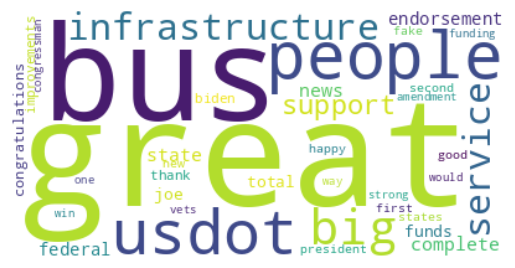

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc1 = WordCloud(background_color='white')
wc1.generate_from_frequencies(frequencies=FrequencyTrumpTokens.to_dict())
plt.figure()
plt.imshow(wc1, interpolation="bilinear")
plt.axis("off")
plt.show()

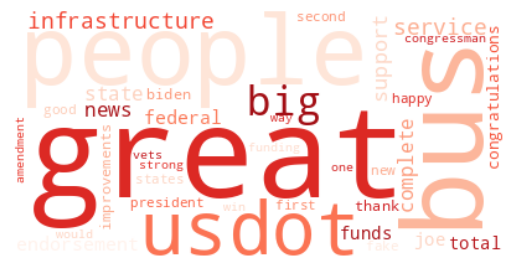

In [18]:
wc2 = WordCloud(background_color='white',
                colormap="Reds")
wc2.generate_from_frequencies(frequencies=FrequencyTrumpTokens.to_dict())
plt.figure()
plt.imshow(wc2, interpolation="bilinear")
plt.axis("off")
plt.show()

## Bigrams

We can do the same with pairs of words (bigrams). Let me open a text file:

In [19]:
f = open("/workspaces/Tarea-4_ASIES/tarea4/sometext.txt", "r")


textFile = r"/workspaces/Tarea-4_ASIES/tarea4/sometext.txt"
allText=pd.read_table(textFile,header=None)

#see the text
allText

,0
0,Seattle is under siege. Over the past five yea...
1,"At the same time, according to the Puget Sound..."
2,"Over the past year, I’ve spent time at city co..."
3,Seattle has long been known as one of America’...
4,"On the surface, this argument has its own inte..."
5,"Even in a pricey city like Seattle, most worki..."
6,Using homelessness as a symbol of “capitalism’...
7,"What the socialists won’t, or can’t, see is th..."
8,The stubborn reality is that Seattle is expens...
9,"“What the socialists won’t, or can’t, see is t..."


Let's normalize the text to lowercase:

In [20]:
type(allText)

pandas.core.frame.DataFrame

In [21]:
allText[0]=allText[0].str.lower()
allText[0]=allText[0].str.replace('['+PUNCs+']', '',regex=True)

Let me create the bigrams:

In [22]:
from nltk import bigrams

theBigrams=[bigrams(eachTW.split()) for eachTW in allText[0]]


# list of all bigrams
from itertools import chain

pairWords = list(chain(*theBigrams))

pairWords

[('seattle', 'is'),
 ('is', 'under'),
 ('under', 'siege'),
 ('siege', 'over'),
 ('over', 'the'),
 ('the', 'past'),
 ('past', 'five'),
 ('five', 'years'),
 ('years', 'the'),
 ('the', 'emerald'),
 ('emerald', 'city'),
 ('city', 'has'),
 ('has', 'seen'),
 ('seen', 'an'),
 ('an', 'explosion'),
 ('explosion', 'of'),
 ('of', 'homelessness'),
 ('homelessness', 'crime'),
 ('crime', 'and'),
 ('and', 'addiction'),
 ('addiction', 'in'),
 ('in', 'its'),
 ('its', '2017'),
 ('2017', 'pointintime'),
 ('pointintime', 'count'),
 ('count', 'of'),
 ('of', 'the'),
 ('the', 'homeless'),
 ('homeless', 'king'),
 ('king', 'county'),
 ('county', 'socialservices'),
 ('socialservices', 'agency'),
 ('agency', 'all'),
 ('all', 'home'),
 ('home', 'found'),
 ('found', '11643'),
 ('11643', 'people'),
 ('people', 'sleeping'),
 ('sleeping', 'in'),
 ('in', 'tents'),
 ('tents', 'cars'),
 ('cars', 'and'),
 ('and', 'emergency'),
 ('emergency', 'shelters'),
 ('shelters', 'property'),
 ('property', 'crime'),
 ('crime', 'has'

I will also use the **stopwords** here. I will get rid of any pair of words that include at least one of the **stopwords**:

In [23]:
pairWords_clean = [gram for gram in pairWords if not any(stop in gram for stop in STOPS)]
print(pairWords_clean)

[('past', 'five'), ('five', 'years'), ('emerald', 'city'), ('homelessness', 'crime'), ('2017', 'pointintime'), ('pointintime', 'count'), ('homeless', 'king'), ('king', 'county'), ('county', 'socialservices'), ('socialservices', 'agency'), ('home', 'found'), ('found', '11643'), ('11643', 'people'), ('people', 'sleeping'), ('tents', 'cars'), ('emergency', 'shelters'), ('shelters', 'property'), ('property', 'crime'), ('rate', 'two'), ('half', 'times'), ('times', 'higher'), ('los', 'angeles’s'), ('four', 'times'), ('times', 'higher'), ('new', 'york'), ('york', 'city’s'), ('city’s', 'cleanup'), ('cleanup', 'crews'), ('crews', 'pick'), ('dirty', 'needles'), ('city', 'streets'), ('parks', 'every'), ('every', 'year'), ('time', 'according'), ('puget', 'sound'), ('sound', 'business'), ('business', 'journal'), ('seattle', 'metro'), ('metro', 'area'), ('area', 'spends'), ('1', 'billion'), ('billion', 'fighting'), ('fighting', 'homelessness'), ('homelessness', 'every'), ('every', 'year'), ('year', 

At this stage, let me create a frequency table of the bigrams:

In [24]:
from collections import Counter

bigramsCount_dict = Counter(pairWords_clean) #generate counter

# Turn bigramsCount_dict  into dataframe, naming columns
bigramsCount = pd.DataFrame(bigramsCount_dict.most_common(),
                        columns=['theBigram', 'weight'])
bigramsCount

,theBigram,weight
0,"(king, county)",8
1,"(addiction, evangelists)",7
2,"(homelessindustrial, complex)",6
3,"(harm, reduction)",5
4,"(homeless, encampments)",4
...,...,...
1383,"(people, able)",1
1384,"(live, work)",1
1385,"(flourishing, environment)",1
1386,"(whether, political)",1


I need to create two columns from the tuples:

In [25]:
bigramsCount['word1'], bigramsCount['word2'] =zip(*bigramsCount['theBigram'])
bigramsCount

,theBigram,weight,word1,word2
0,"(king, county)",8,king,county
1,"(addiction, evangelists)",7,addiction,evangelists
2,"(homelessindustrial, complex)",6,homelessindustrial,complex
3,"(harm, reduction)",5,harm,reduction
4,"(homeless, encampments)",4,homeless,encampments
...,...,...,...,...
1383,"(people, able)",1,people,able
1384,"(live, work)",1,live,work
1385,"(flourishing, environment)",1,flourishing,environment
1386,"(whether, political)",1,whether,political


I will use those columns with networkx:

In [26]:
import networkx as nx

G_bigram=nx.from_pandas_edgelist(df=bigramsCount, source='word1',target= 'word2',edge_attr= ["weight"])

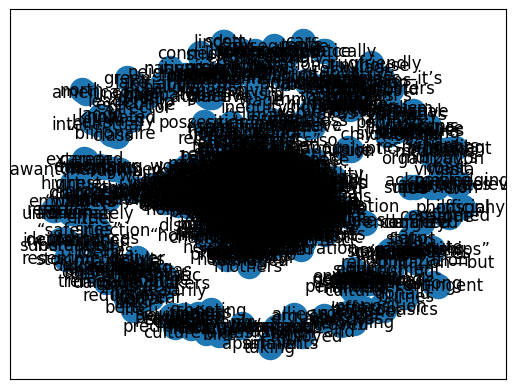

In [27]:
# plotting graph (default layout)
nx.draw_networkx(G_bigram)

I should subset:

In [28]:
#subsetting
bigramsCount_wgte_3=bigramsCount[bigramsCount['weight']>=3]

G_bigram_wgte_3=nx.from_pandas_edgelist(df=bigramsCount_wgte_3, source='word1',target= 'word2',edge_attr= ["weight"])

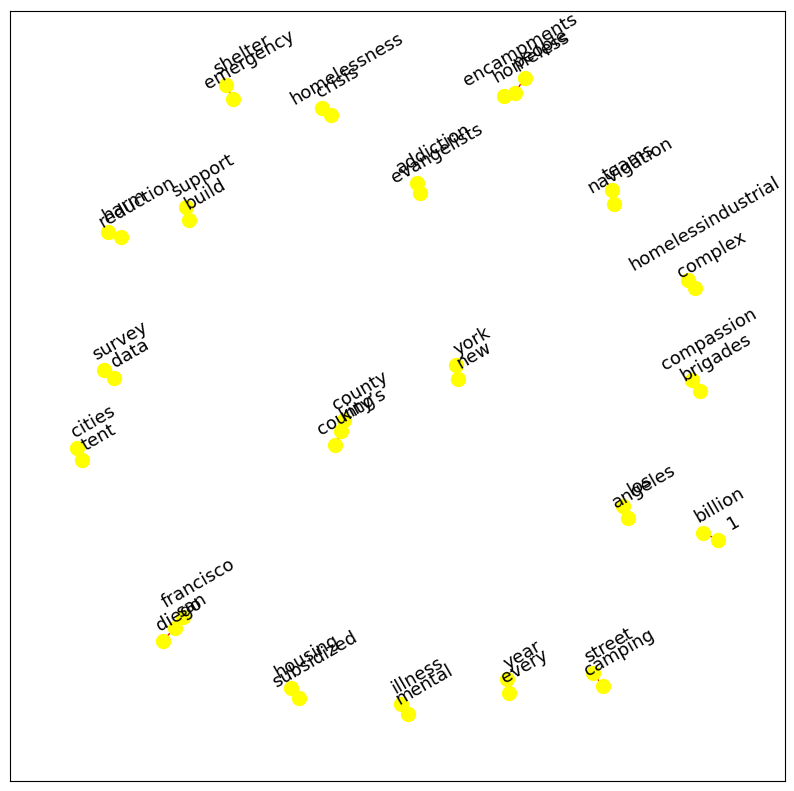

In [29]:

#plotting
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(G_bigram_wgte_3)

# Plot networks
nx.draw_networkx(G_bigram_wgte_3, pos,
                 edge_color='red',node_color='yellow',
                 node_size=100,with_labels = False,ax=ax)

# labels away from node
for word, freq in pos.items():
    x, y = freq[0]+.05, freq[1]+.03
    ax.text(x, y,s=word,horizontalalignment='center',
            fontsize=13,rotation=30)

plt.show()

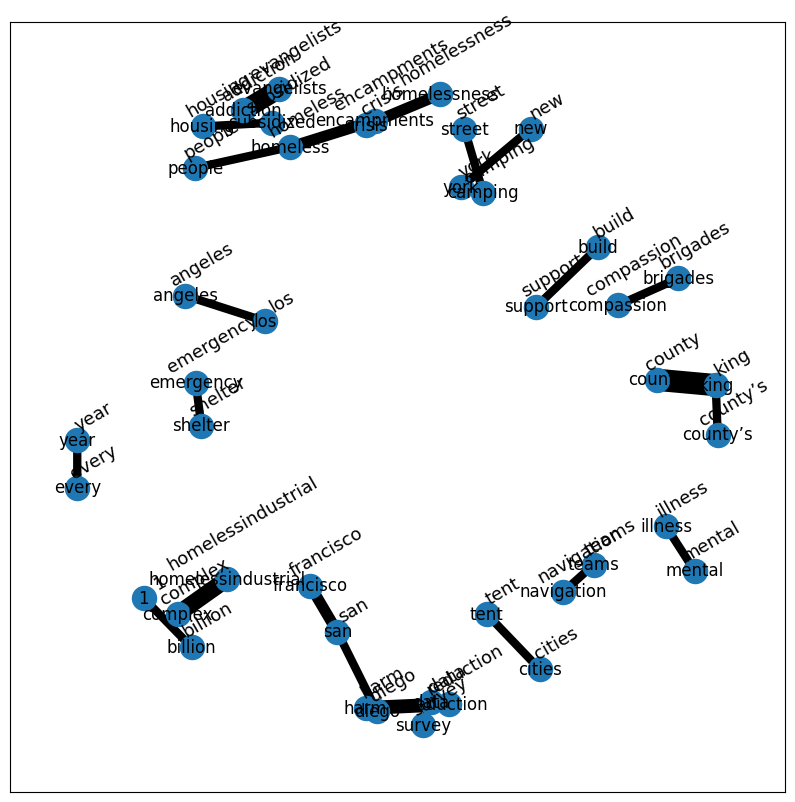

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(G_bigram_wgte_3, weight='weight',k=0.6)
nx.draw_networkx(G_bigram_wgte_3, pos)

# labels away from node
for word, freq in pos.items():
    x, y = freq[0]+.05, freq[1]+.03
    ax.text(x, y,s=word,horizontalalignment='center',
            fontsize=13,rotation=30)

for edge in G_bigram_wgte_3.edges(data='weight'):
    nx.draw_networkx_edges(G_bigram_wgte_3, pos, edgelist=[edge], width=2*edge[2])


<div class="alert-success">

<strong>Exercise</strong>
    
1. Create a GitHub repo.
2. Create a notebook in python, and do a wordcloud with a text in English. Use a file in txt.
3. Create a notebook in python, and do a bigram the previous txt file.
4. Publish the result as a webpage using GitHub
    
</div>

<div class="alert alert-danger">
  <strong>CHALLENGE!</strong>
   <br> * Use the function [n-grams](https://tedboy.github.io/nlps/generated/generated/nltk.ngrams.html) from NLTK, for 3-grams and 4-grams. Use a text in Spanish.
</div>

# Ejercicio con editoriales de El Comercio como data

In [31]:
import os
# Establecer el directorio de trabajo
os.chdir(r'/workspaces/Tarea-4_ASIES/tarea4/EC_12abril_2mayo')

In [32]:
# Lista para almacenar el contenido de los archivos
textos = []

# Leer cada archivo de texto en el directorio especificado
for archivo in os.listdir():
    if archivo.endswith('.txt'):
        with open(archivo, 'r', encoding='utf-8') as file:
            textos.append(file.read())

# 'textos' ahora contiene el contenido de cada archivo .txt

In [33]:
textos

['La segunda vuelta no es un proceso de definiciones políticas que compromete solo a los dos candidatos que continúan compitiendo por acceder a la presidencia o a sus partidos. También los postulantes que quedaron fuera de carrera tras la votación del 11 de abril tienen responsabilidades que no deberían eludir. En la medida en que representaron a determinados sectores ciudadanos en la primera etapa de la contienda les corresponde, efectivamente, velar por lo que suceda con los intereses y valores de tales sectores en la segunda.\n\nAlgunos de ellos, sin embargo, dolidos por las noticias que les trajo el conteo de votos o temerosos de perjudicarse si se involucran demasiado en el respaldo o rechazo a las posiciones de los dos aspirantes todavía en liza, prefieren ignorar las demandas que la situación les plantea. No se trata, por cierto, de que forzosamente endosen una candidatura o la otra, sino de que señalen los riesgos que cada una de ellas entraña para orientar de esa manera a quie

In [34]:
import numpy as np
import pandas as pd

# Crear un DataFrame a partir de la lista de textos
df_textos = pd.DataFrame(textos, columns=['texto'])

# Utilizar la función de split y luego concatenar usando numpy
seriepalabras = pd.Series(np.concatenate(df_textos['texto'].str.split()))
seriepalabras

0               La
1          segunda
2           vuelta
3               no
4               es
           ...    
13233          Sin
13234    controles
13235            y
13236          sin
13237    mordazas.
Length: 13238, dtype: object

In [35]:
# punctuation
import string
PUNCs=string.punctuation # '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
seriepalabras=seriepalabras.str.replace('['+PUNCs+']', '',regex=True)

# all to lower case
seriepalabras=seriepalabras.str.lower()
seriepalabras

0               la
1          segunda
2           vuelta
3               no
4               es
           ...    
13233          sin
13234    controles
13235            y
13236          sin
13237     mordazas
Length: 13238, dtype: object

In [36]:
seriepalabras.value_counts()

de             824
la             546
que            514
en             394
el             385
              ... 
collao           1
puno             1
congresista      1
edgar            1
2000             1
Name: count, Length: 3469, dtype: int64

In [37]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
spanish_stopwords = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
import pandas as pd

# Supongamos que seriepalabras es una serie con todas las palabras de los textos
# y necesitamos filtrar las stopwords
seriepalabras = seriepalabras[~seriepalabras.isin(spanish_stopwords)].reset_index(drop=True)
seriepalabras

0            segunda
1             vuelta
2            proceso
3       definiciones
4          políticas
            ...     
6677           turno
6678           clave
6679            ello
6680       controles
6681        mordazas
Length: 6682, dtype: object

In [39]:
seriepalabras.value_counts()

castillo       54
perú           43
ser            33
si             32
solo           30
               ..
alcances        1
explícitos      1
socorrido       1
fácilmente      1
contradicho     1
Name: count, Length: 3317, dtype: int64

In [40]:
EC_12abril_2mayo=seriepalabras.value_counts()[seriepalabras.value_counts()>10]
EC_12abril_2mayo

castillo     54
perú         43
ser          33
si           32
solo         30
             ..
mientras     11
menos        11
años         11
hacer        11
electoral    11
Name: count, Length: 75, dtype: int64

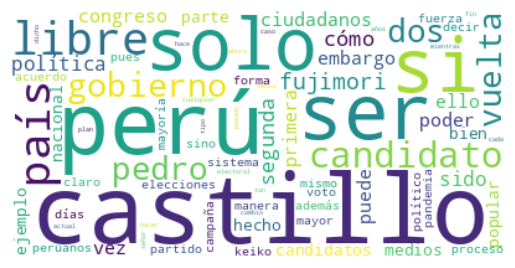

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

EC_wc = WordCloud(background_color='white')
EC_wc.generate_from_frequencies(frequencies=EC_12abril_2mayo.to_dict())
plt.figure()
plt.imshow(EC_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [42]:
df_textos

,texto
0,La segunda vuelta no es un proceso de definici...
1,"En la peor de las condiciones posibles, con un..."
2,Con las tensiones de segunda vuelta al alza mi...
3,"En abril, un peruano ha muerto cada cinco minu..."
4,Si en algún momento había que decir que la pan...
5,El principal propósito del sistema del balotaj...
6,Sería un esfuerzo fútil y hasta avezado el int...
7,Luego de que encabezó una larga y violenta hue...
8,Ante las dudas de si el candidato Pedro Castil...
9,"En los últimos días, diversos representantes d..."


In [43]:
type(seriepalabras)

pandas.core.series.Series

In [44]:
type(df_textos)

pandas.core.frame.DataFrame

In [45]:
# Convertir todo el texto en la columna 'texto' a minúsculas
df_textos['texto'] = df_textos['texto'].str.lower()

# Reemplazar los caracteres de puntuación en la columna 'texto'
df_textos['texto'] = df_textos['texto'].str.replace('[' + PUNCs + ']', '', regex=True)

In [46]:
from nltk import bigrams

theBigrams_EC=[bigrams(eachTW.split()) for eachTW in df_textos['texto']]


# list of all bigrams
from itertools import chain

pairWords_EC = list(chain(*theBigrams_EC))

pairWords_EC

[('la', 'segunda'),
 ('segunda', 'vuelta'),
 ('vuelta', 'no'),
 ('no', 'es'),
 ('es', 'un'),
 ('un', 'proceso'),
 ('proceso', 'de'),
 ('de', 'definiciones'),
 ('definiciones', 'políticas'),
 ('políticas', 'que'),
 ('que', 'compromete'),
 ('compromete', 'solo'),
 ('solo', 'a'),
 ('a', 'los'),
 ('los', 'dos'),
 ('dos', 'candidatos'),
 ('candidatos', 'que'),
 ('que', 'continúan'),
 ('continúan', 'compitiendo'),
 ('compitiendo', 'por'),
 ('por', 'acceder'),
 ('acceder', 'a'),
 ('a', 'la'),
 ('la', 'presidencia'),
 ('presidencia', 'o'),
 ('o', 'a'),
 ('a', 'sus'),
 ('sus', 'partidos'),
 ('partidos', 'también'),
 ('también', 'los'),
 ('los', 'postulantes'),
 ('postulantes', 'que'),
 ('que', 'quedaron'),
 ('quedaron', 'fuera'),
 ('fuera', 'de'),
 ('de', 'carrera'),
 ('carrera', 'tras'),
 ('tras', 'la'),
 ('la', 'votación'),
 ('votación', 'del'),
 ('del', '11'),
 ('11', 'de'),
 ('de', 'abril'),
 ('abril', 'tienen'),
 ('tienen', 'responsabilidades'),
 ('responsabilidades', 'que'),
 ('que', 'no'

In [47]:
pairWords_EC_clean = [gram for gram in pairWords_EC if not any(stop in gram for stop in spanish_stopwords)]
print(pairWords_EC_clean)

[('segunda', 'vuelta'), ('definiciones', 'políticas'), ('compromete', 'solo'), ('dos', 'candidatos'), ('continúan', 'compitiendo'), ('carrera', 'tras'), ('deberían', 'eludir'), ('determinados', 'sectores'), ('sectores', 'ciudadanos'), ('primera', 'etapa'), ('corresponde', 'efectivamente'), ('efectivamente', 'velar'), ('tales', 'sectores'), ('embargo', 'dolidos'), ('perjudicarse', 'si'), ('involucran', 'demasiado'), ('dos', 'aspirantes'), ('aspirantes', 'todavía'), ('liza', 'prefieren'), ('prefieren', 'ignorar'), ('forzosamente', 'endosen'), ('primera', 'vuelta'), ('consiste', 'precisamente'), ('líder', 'político'), ('eventual', 'respaldo'), ('dos', 'opciones'), ('disputa', 'debería'), ('debería', 'ser'), ('premisa', 'lamentablemente'), ('manera', 'sumaria'), ('acompañarlo', 'luego'), ('otorgado', 'podrían'), ('podrían', 'sentirse'), ('sentirse', 'defraudados'), ('protagonismo', 'alcanzado'), ('primera', 'parte'), ('expostulante', 'ejerza'), ('ejerza', 'eficazmente'), ('apoyo', 'según')

In [48]:
from collections import Counter

bigramsCount_dict_EC = Counter(pairWords_EC_clean) #generate counter

# Turn bigramsCount_dict  into dataframe, naming columns
bigramsCount_EC = pd.DataFrame(bigramsCount_dict_EC.most_common(),
                        columns=['bigrama', 'peso'])
bigramsCount_EC

,bigrama,peso
0,"(perú, libre)",30
1,"(pedro, castillo)",24
2,"(segunda, vuelta)",15
3,"(keiko, fujimori)",13
4,"(fuerza, popular)",13
...,...,...
2204,"(además, cita)",1
2205,"(lenin, fidel)",1
2206,"(rafael, correa)",1
2207,"(referentes, ejemplares)",1


In [49]:
bigramsCount_EC['palabra 1'], bigramsCount_EC['palabra 2'] = zip(*bigramsCount_EC['bigrama'])
bigramsCount_EC

,bigrama,peso,palabra 1,palabra 2
0,"(perú, libre)",30,perú,libre
1,"(pedro, castillo)",24,pedro,castillo
2,"(segunda, vuelta)",15,segunda,vuelta
3,"(keiko, fujimori)",13,keiko,fujimori
4,"(fuerza, popular)",13,fuerza,popular
...,...,...,...,...
2204,"(además, cita)",1,además,cita
2205,"(lenin, fidel)",1,lenin,fidel
2206,"(rafael, correa)",1,rafael,correa
2207,"(referentes, ejemplares)",1,referentes,ejemplares


In [50]:
filtered_bigrams_3 = bigramsCount_EC[bigramsCount_EC['peso'] >= 3]

In [51]:
import networkx as nx
G_bigram_EC_3=nx.from_pandas_edgelist(df=filtered_bigrams_3, source='palabra 1',target= 'palabra 2',edge_attr= ["peso"])

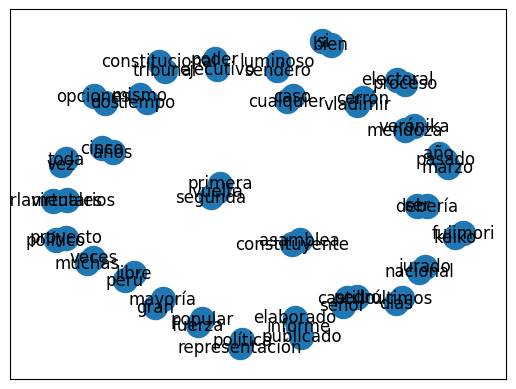

In [52]:
# plotting graph (default layout)
nx.draw_networkx(G_bigram_EC_3)

# Reto: 3-gramas

In [53]:
import pandas as pd
from nltk.util import ngrams

# 'texto' es la columna de texto
the3grams_EC = [list(ngrams(eachTW.split(), 3)) for eachTW in df_textos['texto']]

In [54]:
# list of all bigrams
from itertools import chain

triWords_EC = list(chain(*the3grams_EC))

triWords_EC

[('la', 'segunda', 'vuelta'),
 ('segunda', 'vuelta', 'no'),
 ('vuelta', 'no', 'es'),
 ('no', 'es', 'un'),
 ('es', 'un', 'proceso'),
 ('un', 'proceso', 'de'),
 ('proceso', 'de', 'definiciones'),
 ('de', 'definiciones', 'políticas'),
 ('definiciones', 'políticas', 'que'),
 ('políticas', 'que', 'compromete'),
 ('que', 'compromete', 'solo'),
 ('compromete', 'solo', 'a'),
 ('solo', 'a', 'los'),
 ('a', 'los', 'dos'),
 ('los', 'dos', 'candidatos'),
 ('dos', 'candidatos', 'que'),
 ('candidatos', 'que', 'continúan'),
 ('que', 'continúan', 'compitiendo'),
 ('continúan', 'compitiendo', 'por'),
 ('compitiendo', 'por', 'acceder'),
 ('por', 'acceder', 'a'),
 ('acceder', 'a', 'la'),
 ('a', 'la', 'presidencia'),
 ('la', 'presidencia', 'o'),
 ('presidencia', 'o', 'a'),
 ('o', 'a', 'sus'),
 ('a', 'sus', 'partidos'),
 ('sus', 'partidos', 'también'),
 ('partidos', 'también', 'los'),
 ('también', 'los', 'postulantes'),
 ('los', 'postulantes', 'que'),
 ('postulantes', 'que', 'quedaron'),
 ('que', 'quedaron'

In [55]:
triWords_EC_clean = [gram for gram in triWords_EC if not any(stop in gram for stop in spanish_stopwords)]
print(triWords_EC_clean)

[('determinados', 'sectores', 'ciudadanos'), ('corresponde', 'efectivamente', 'velar'), ('dos', 'aspirantes', 'todavía'), ('liza', 'prefieren', 'ignorar'), ('disputa', 'debería', 'ser'), ('otorgado', 'podrían', 'sentirse'), ('podrían', 'sentirse', 'defraudados'), ('expostulante', 'ejerza', 'eficazmente'), ('apoyo', 'según', 'dicte'), ('proceso', 'verónika', 'mendoza'), ('viene', 'llevando', 'adelante'), ('obstante', 'verónika', 'mendoza'), ('sencillamente', 'prefiere', 'callar'), ('voto', '“estoy', 'proponiendo'), ('comunicado', 'divulgado', 'ayer'), ('divulgado', 'ayer', '¿debemos'), ('ayer', '¿debemos', 'entender'), ('¿debemos', 'entender', 'acaso'), ('avanza', 'país', 'mientras'), ('canciller', 'francisco', 'tudela'), ('proyecto', 'político', 'conjunto'), ('político', 'conjunto', 'argumentando'), ('puede', 'ser', 'indeciso'), ('ver', 'quién', 'gana”'), ('señora', 'mendoza', 'parecería'), ('peruanos', 'acudimos', 'ayer'), ('derechos', 'democráticos', 'elegir'), ('manera', 'accidentad

In [56]:
from collections import Counter

trigramsCount_dict_EC = Counter(triWords_EC_clean) #generate counter

# Turn bigramsCount_dict  into dataframe, naming columns
trigramsCount_EC = pd.DataFrame(trigramsCount_dict_EC.most_common(),
                        columns=['trigrama', 'peso'])
trigramsCount_EC

,trigrama,peso
0,"(determinados, sectores, ciudadanos)",2
1,"(rafael, lópez, aliaga)",2
2,"(perú, libre, pedro)",2
3,"(libre, pedro, castillo)",2
4,"(keiko, fujimori, fuerza)",2
...,...,...
813,"(ningún, demócrata, debería)",1
814,"(demócrata, debería, abrir)",1
815,"(venezuela, además, cita)",1
816,"(vladimir, lenin, fidel)",1


In [57]:
trigramsCount_EC['palabra 1'], trigramsCount_EC['palabra 2'], trigramsCount_EC['palabra 3'] = zip(*trigramsCount_EC['trigrama'])
trigramsCount_EC

,trigrama,peso,palabra 1,palabra 2,palabra 3
0,"(determinados, sectores, ciudadanos)",2,determinados,sectores,ciudadanos
1,"(rafael, lópez, aliaga)",2,rafael,lópez,aliaga
2,"(perú, libre, pedro)",2,perú,libre,pedro
3,"(libre, pedro, castillo)",2,libre,pedro,castillo
4,"(keiko, fujimori, fuerza)",2,keiko,fujimori,fuerza
...,...,...,...,...,...
813,"(ningún, demócrata, debería)",1,ningún,demócrata,debería
814,"(demócrata, debería, abrir)",1,demócrata,debería,abrir
815,"(venezuela, además, cita)",1,venezuela,además,cita
816,"(vladimir, lenin, fidel)",1,vladimir,lenin,fidel


In [58]:
filtered_trigrams = trigramsCount_EC[trigramsCount_EC['peso'] >= 2]

In [59]:
import pandas as pd
import networkx as nx

# Preparar el DataFrame para NetworkX
edges = pd.concat([
    filtered_trigrams[['palabra 1', 'palabra 2', 'peso']].rename(columns={'palabra 1': 'source', 'palabra 2': 'target'}),
    filtered_trigrams[['palabra 2', 'palabra 3', 'peso']].rename(columns={'palabra 2': 'source', 'palabra 3': 'target'})
])

# Crear el grafo desde el DataFrame de aristas
G_trigram_EC = nx.from_pandas_edgelist(df=edges, source='source', target='target', edge_attr=["peso"])

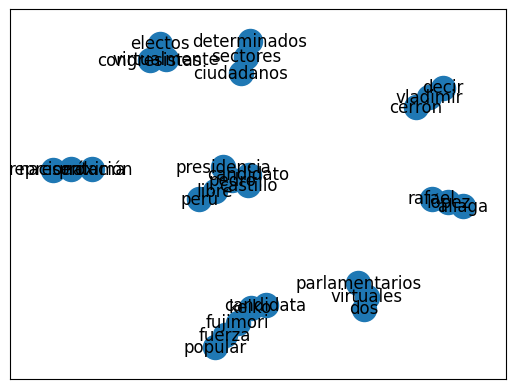

In [60]:
nx.draw_networkx(G_trigram_EC)

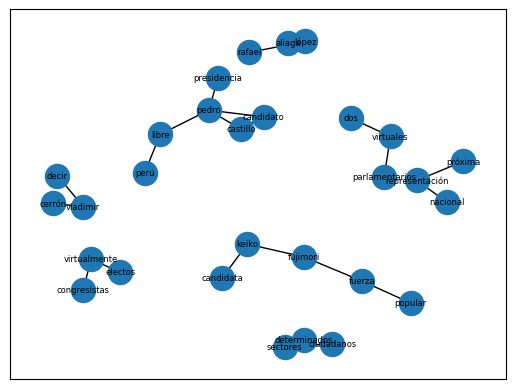

In [61]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G_trigram_EC, k=0.4, iterations=40)  # Ajusta k para cambiar la distancia entre nodos
nx.draw_networkx(G_trigram_EC, pos, font_size=6)
plt.show()

# Reto: 4-gramas

In [62]:
the4grams_EC = [list(ngrams(eachTW.split(), 4)) for eachTW in df_textos['texto']]

In [63]:
tetraWords_EC = list(chain(*the4grams_EC))
tetraWords_EC

[('la', 'segunda', 'vuelta', 'no'),
 ('segunda', 'vuelta', 'no', 'es'),
 ('vuelta', 'no', 'es', 'un'),
 ('no', 'es', 'un', 'proceso'),
 ('es', 'un', 'proceso', 'de'),
 ('un', 'proceso', 'de', 'definiciones'),
 ('proceso', 'de', 'definiciones', 'políticas'),
 ('de', 'definiciones', 'políticas', 'que'),
 ('definiciones', 'políticas', 'que', 'compromete'),
 ('políticas', 'que', 'compromete', 'solo'),
 ('que', 'compromete', 'solo', 'a'),
 ('compromete', 'solo', 'a', 'los'),
 ('solo', 'a', 'los', 'dos'),
 ('a', 'los', 'dos', 'candidatos'),
 ('los', 'dos', 'candidatos', 'que'),
 ('dos', 'candidatos', 'que', 'continúan'),
 ('candidatos', 'que', 'continúan', 'compitiendo'),
 ('que', 'continúan', 'compitiendo', 'por'),
 ('continúan', 'compitiendo', 'por', 'acceder'),
 ('compitiendo', 'por', 'acceder', 'a'),
 ('por', 'acceder', 'a', 'la'),
 ('acceder', 'a', 'la', 'presidencia'),
 ('a', 'la', 'presidencia', 'o'),
 ('la', 'presidencia', 'o', 'a'),
 ('presidencia', 'o', 'a', 'sus'),
 ('o', 'a', 'su

In [64]:
tetraWords_EC_clean = [gram for gram in tetraWords_EC if not any(stop in gram for stop in spanish_stopwords)]
print(tetraWords_EC_clean)

[('otorgado', 'podrían', 'sentirse', 'defraudados'), ('comunicado', 'divulgado', 'ayer', '¿debemos'), ('divulgado', 'ayer', '¿debemos', 'entender'), ('ayer', '¿debemos', 'entender', 'acaso'), ('proyecto', 'político', 'conjunto', 'argumentando'), ('pocas', 'quejas', 'cuya', 'pertinencia'), ('señor', 'rafael', 'lópez', 'aliaga'), ('rafael', 'lópez', 'aliaga', 'sugiriesen'), ('verdaderos', 'sobresaltos', 'recién', 'llegaron'), ('perú', 'libre', 'pedro', 'castillo'), ('libre', 'pedro', 'castillo', 'consolidó'), ('siguen', 'keiko', 'fujimori', 'fuerza'), ('keiko', 'fujimori', 'fuerza', 'popular'), ('rafael', 'lópez', 'aliaga', 'renovación'), ('lópez', 'aliaga', 'renovación', 'popular'), ('124', 'hará', 'falta', 'esperar'), ('desenlace', 'solo', 'augura', 'aún'), ('dos', 'opciones', 'diametralmente', 'distintas'), ('opciones', 'diametralmente', 'distintas', 'ello'), ('decirlo', 'profesa', 'perspectivas', 'antojadizas'), ('sistema', 'político', 'debe', 'funcionar'), ('excongresista', 'marisa'

In [65]:
tetragramsCount_dict_EC = Counter(tetraWords_EC_clean) #generate counter

# Turn bigramsCount_dict  into dataframe, naming columns
tetragramsCount_EC = pd.DataFrame(tetragramsCount_dict_EC.most_common(),
                        columns=['tetragrama', 'peso'])
tetragramsCount_EC

,tetragrama,peso
0,"(perú, libre, pedro, castillo)",2
1,"(keiko, fujimori, fuerza, popular)",2
2,"(otorgado, podrían, sentirse, defraudados)",1
3,"(comunicado, divulgado, ayer, ¿debemos)",1
4,"(divulgado, ayer, ¿debemos, entender)",1
...,...,...
285,"(contenidos, “basura”, ¿qué, entrañan)",1
286,"(“basura”, ¿qué, entrañan, precisamente)",1
287,"(propone, salvaguardar, ¿qué, garantiza)",1
288,"(ningún, demócrata, debería, abrir)",1


In [66]:
type(tetragramsCount_EC)

pandas.core.frame.DataFrame

In [67]:
tetragramsCount_EC['palabra 1'], tetragramsCount_EC['palabra 2'], tetragramsCount_EC['palabra 3'], tetragramsCount_EC['palabra 4'] = zip(*tetragramsCount_EC['tetragrama'])
tetragramsCount_EC

,tetragrama,peso,palabra 1,palabra 2,palabra 3,palabra 4
0,"(perú, libre, pedro, castillo)",2,perú,libre,pedro,castillo
1,"(keiko, fujimori, fuerza, popular)",2,keiko,fujimori,fuerza,popular
2,"(otorgado, podrían, sentirse, defraudados)",1,otorgado,podrían,sentirse,defraudados
3,"(comunicado, divulgado, ayer, ¿debemos)",1,comunicado,divulgado,ayer,¿debemos
4,"(divulgado, ayer, ¿debemos, entender)",1,divulgado,ayer,¿debemos,entender
...,...,...,...,...,...,...
285,"(contenidos, “basura”, ¿qué, entrañan)",1,contenidos,“basura”,¿qué,entrañan
286,"(“basura”, ¿qué, entrañan, precisamente)",1,“basura”,¿qué,entrañan,precisamente
287,"(propone, salvaguardar, ¿qué, garantiza)",1,propone,salvaguardar,¿qué,garantiza
288,"(ningún, demócrata, debería, abrir)",1,ningún,demócrata,debería,abrir


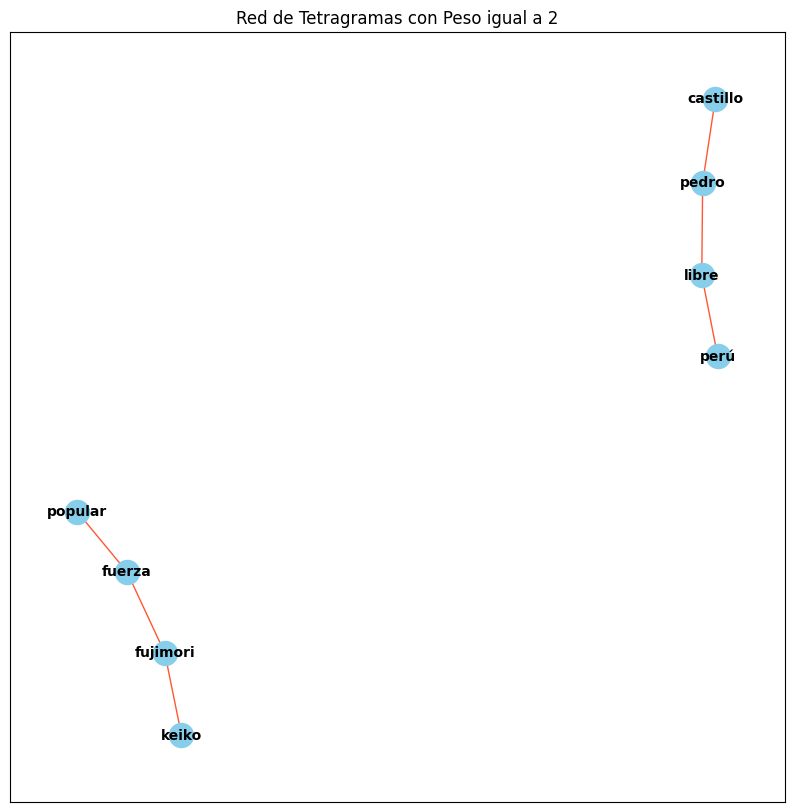

In [68]:
# Supongamos que tetragramsCount_EC tiene las columnas 'palabra 1', 'palabra 2', 'palabra 3', 'palabra 4', 'peso'
# Filtramos los tetragramas por un peso mínimo de 3
filtered_tetragrams = tetragramsCount_EC[tetragramsCount_EC['peso'] == 2]

# Crea un grafo vacío
G_tetragram_EC = nx.Graph()

# Añadir aristas al grafo basadas en cada fila del dataframe filtrado
for idx, row in filtered_tetragrams.iterrows():
    G_tetragram_EC.add_edge(row['palabra 1'], row['palabra 2'], weight=row['peso'])
    G_tetragram_EC.add_edge(row['palabra 2'], row['palabra 3'], weight=row['peso'])
    G_tetragram_EC.add_edge(row['palabra 3'], row['palabra 4'], weight=row['peso'])

# Dibujar el grafo
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
nx.draw_networkx(G_tetragram_EC, with_labels=True, node_color='skyblue', edge_color='#FF5733', font_size=10, font_weight='bold')
plt.title("Red de Tetragramas con Peso igual a 2")
plt.show()

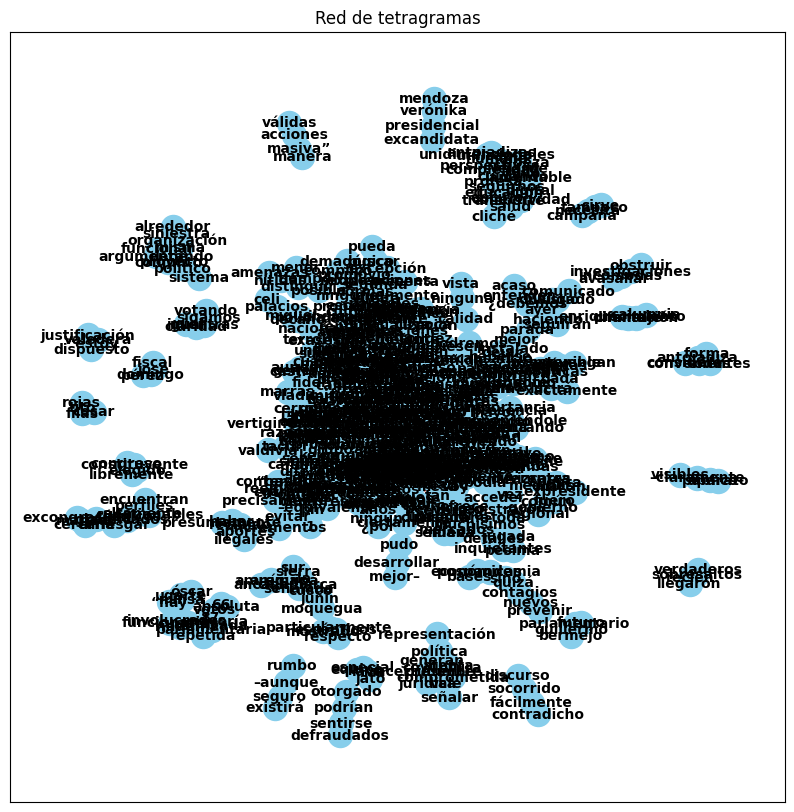

In [69]:
# Creamos un grafo vacío
G_tetragram_EC = nx.Graph()

# Añadir aristas al grafo basadas en cada fila del dataframe filtrado
for idx, row in tetragramsCount_EC.iterrows():
    G_tetragram_EC.add_edge(row['palabra 1'], row['palabra 2'], weight=row['peso'])
    G_tetragram_EC.add_edge(row['palabra 2'], row['palabra 3'], weight=row['peso'])
    G_tetragram_EC.add_edge(row['palabra 3'], row['palabra 4'], weight=row['peso'])

# Dibujar el grafo
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
nx.draw_networkx(G_tetragram_EC, with_labels=True, node_color='skyblue', edge_color='#FF5733', font_size=10, font_weight='bold')
plt.title("Red de tetragramas")
plt.show()